In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataframe = pd.read_csv("regression_project_data.csv")

In [3]:
dataframe.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [4]:
len(dataframe)

17954

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [6]:
dataframe.isnull().mean() * 100

name                              0.000000
full_name                         0.000000
birth_date                        0.000000
age                               0.000000
height_cm                         0.000000
weight_kgs                        0.000000
positions                         0.000000
nationality                       0.000000
overall_rating                    0.000000
potential                         0.000000
value_euro                        1.420296
wage_euro                         1.370168
preferred_foot                    0.000000
international_reputation(1-5)     0.000000
weak_foot(1-5)                    0.000000
skill_moves(1-5)                  0.000000
body_type                         0.000000
release_clause_euro              10.231703
national_team                    95.226690
national_rating                  95.226690
national_team_position           95.226690
national_jersey_number           95.226690
crossing                          0.000000
finishing  

In [7]:
dataframe.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


The columns: national_team, national_ranking and national_team_position have too many null values (around 95% of the whole
dataset). Therefor, lets drop these 3 columns

In [8]:
dataframe.drop(columns=["national_team", "national_rating", "national_team_position","national_jersey_number"], axis=0, inplace=True)

In [9]:
dataframe.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle'],
      dtype='object')

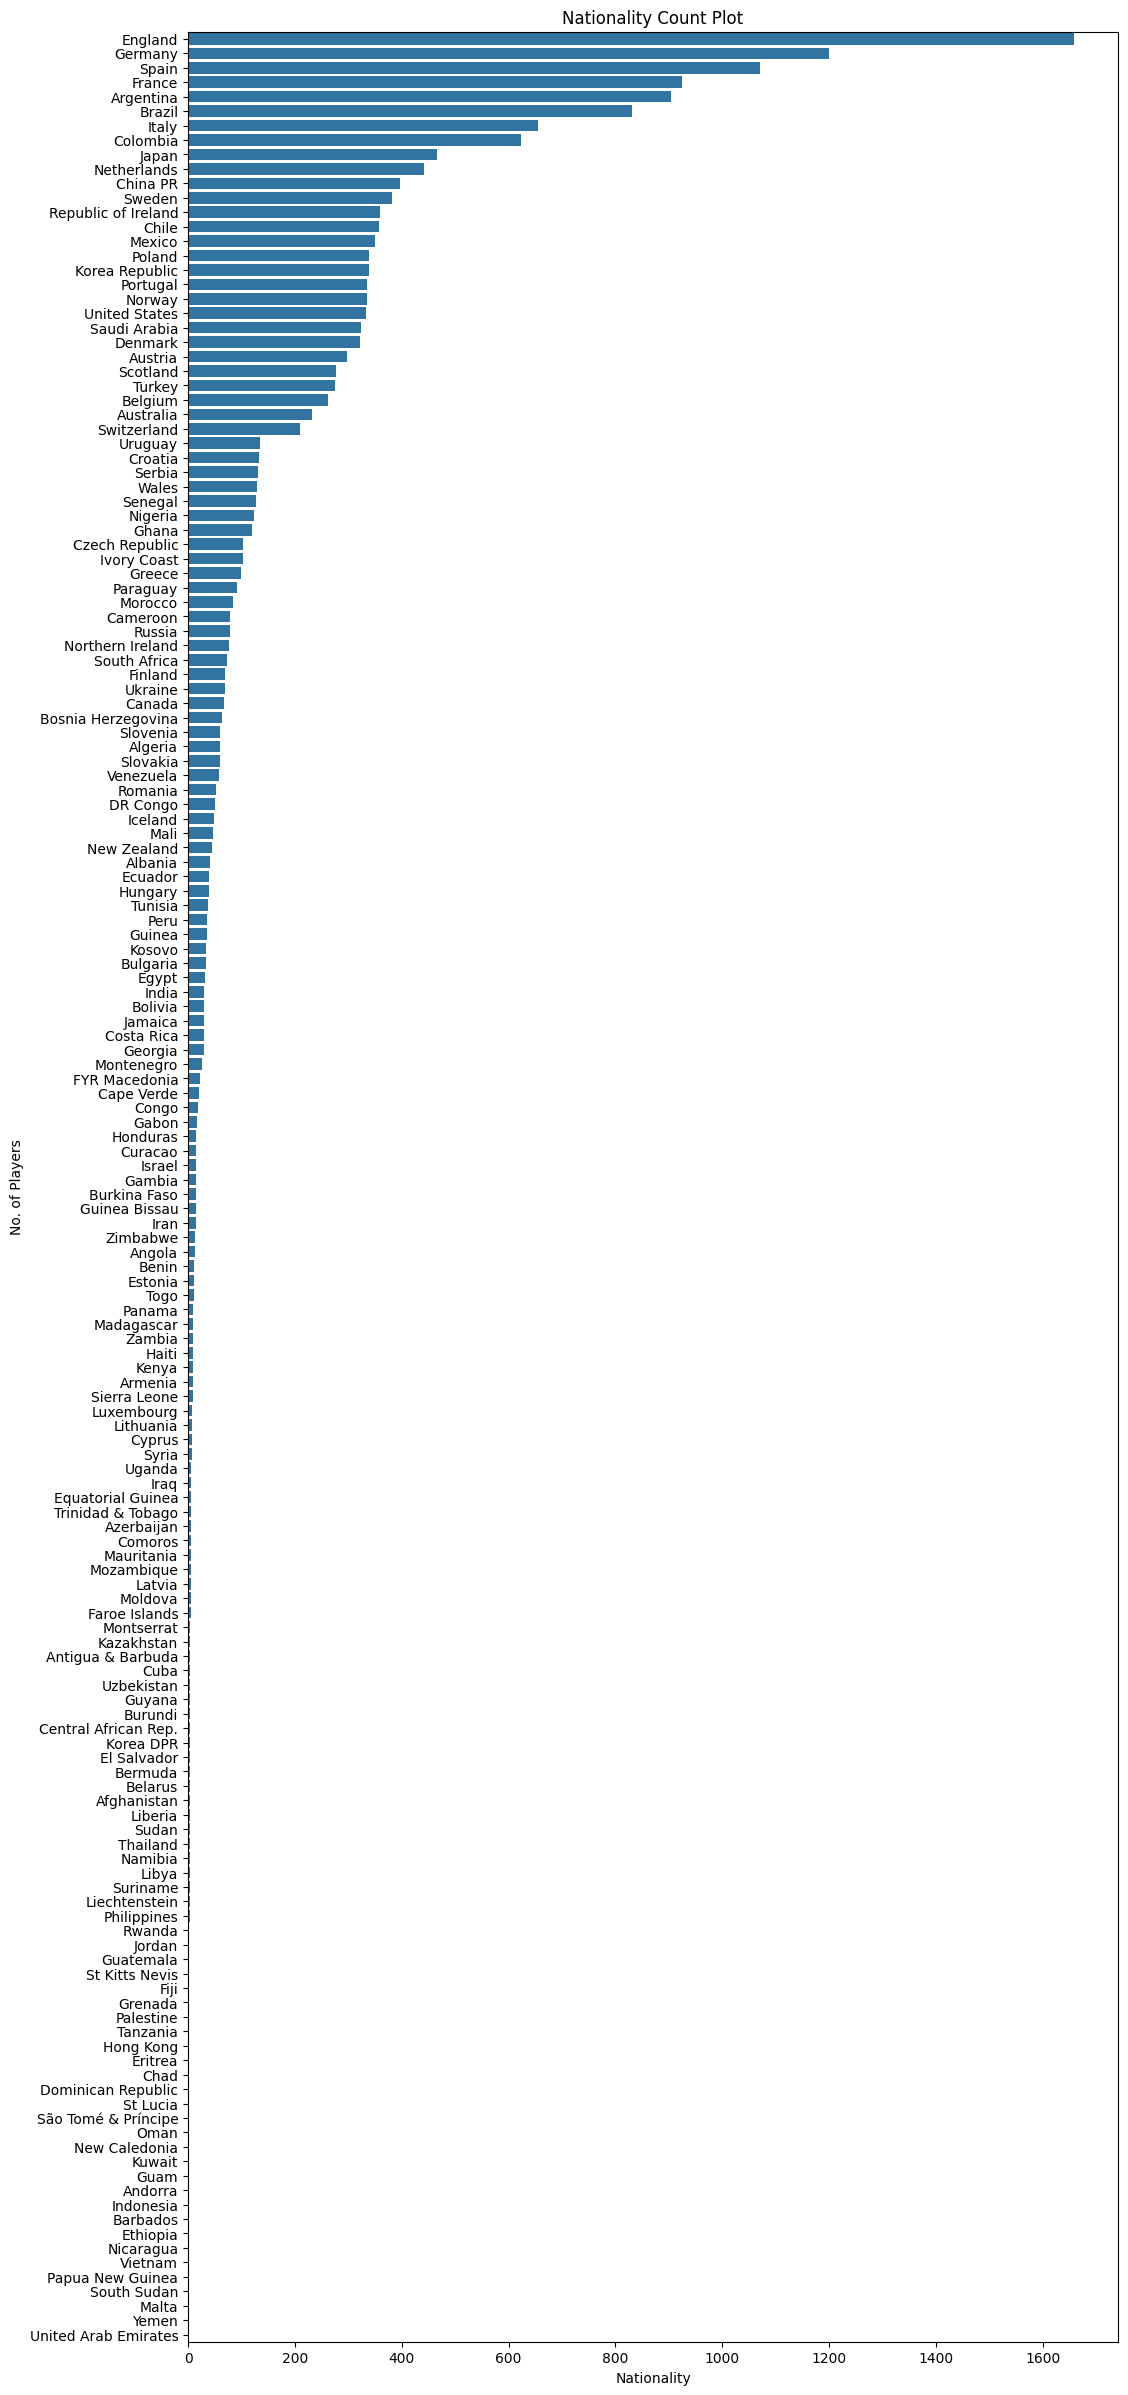

In [10]:
plt.figure(figsize=(12,30))
sns.countplot(data=dataframe['nationality'], order=dataframe['nationality'].value_counts().index)
plt.title("Nationality Count Plot")
plt.xlabel("Nationality")
plt.ylabel("No. of Players")
plt.show()

Lets explore the nationality counts of the top 10 countries 

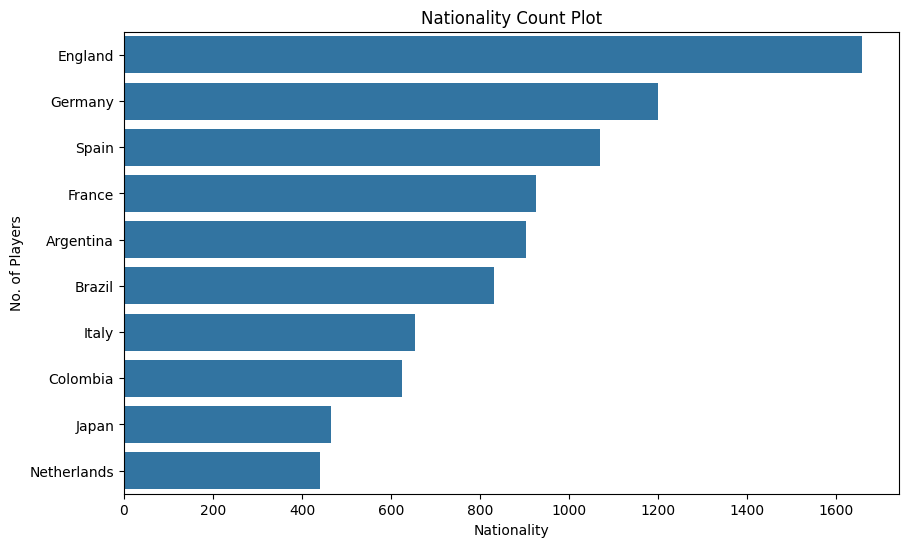

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=dataframe['nationality'], order=dataframe['nationality'].value_counts().nlargest(10).index)
plt.title("Nationality Count Plot")
plt.xlabel("Nationality")
plt.ylabel("No. of Players")
plt.show()

Countries like England, Germany, Spain, and France are traditional football powerhouses with strong domestic leagues, youth academies, and a large pool of professional players.

Skewed Distribution: The distribution of players is heavily skewed, with a few countries contributing a large portion of the players.

In [12]:
dataframe['nationality'].value_counts().nlargest(10)

nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: count, dtype: int64

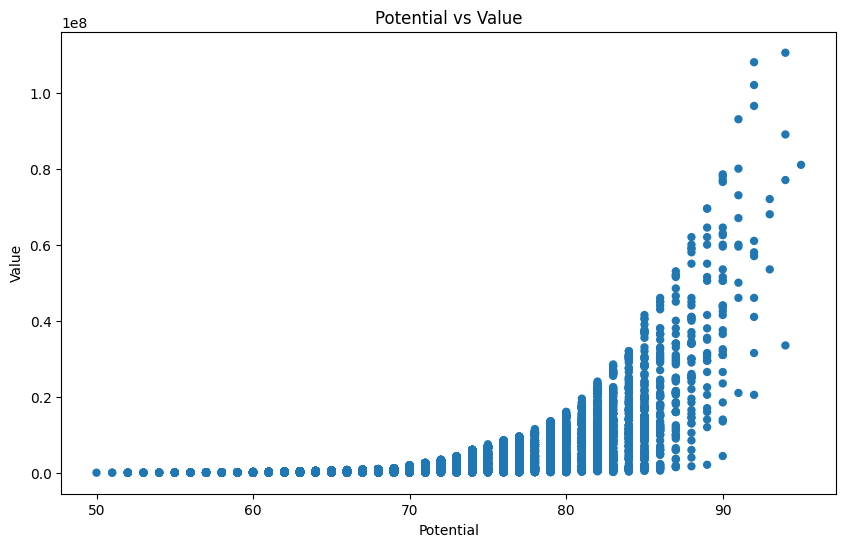

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataframe, x='potential', y='value_euro', edgecolor='none')
plt.title('Potential vs Value')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.show()

The scatter plot resembles an exponential graph suggesting that the market value for players with haigher overall rating is dispoportionally higher than those players with lower overall rating. The exponential relationship is often seen in domains where a small increase in quality makes a big difference in the value.

Higher Rated Players are more valuable

Non linear growth : a player rated 90 could easily be valued more than double the value of a player rated 80

Higher rated players are rare and high in demand in comparison to lower rated players

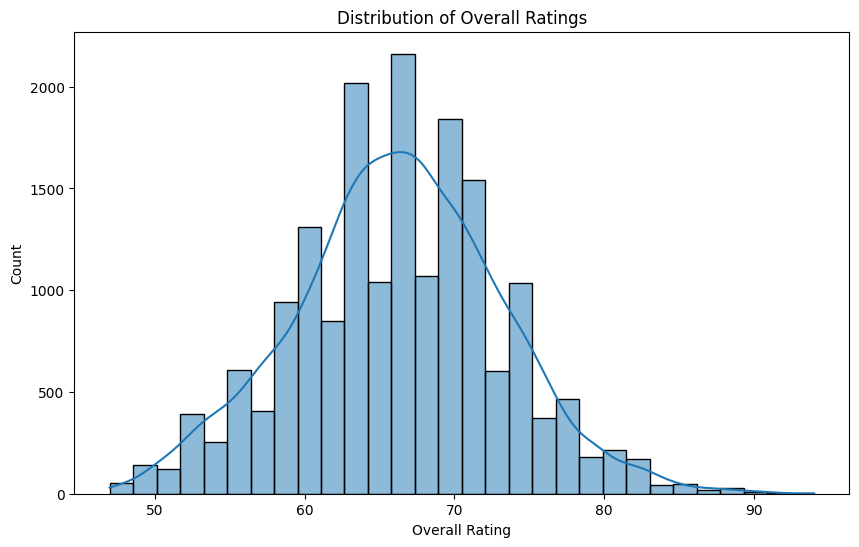

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='overall_rating', bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

In [15]:
dataframe['overall_rating'].mean()

66.24016932159964

The histogram of the overall ratings of players is approximately normally distributed around a mean rating of 66. This indicates that most players have ratings clustered around this average value, with the majority of ratings falling within a typical range around this mean.

However, there are some notable outliers with ratings of 90 and above. These outliers represent exceptional players who stand out significantly from the average. The presence of these high-rated outliers is common in performance metrics, where a few individuals demonstrate outstanding capabilities compared to the rest


In [16]:
Q1 = dataframe['overall_rating'].quantile(0.25)
Q3 = dataframe['overall_rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataframe[(dataframe['overall_rating'] < lower_bound) | (dataframe['overall_rating'] > upper_bound)]

outliers

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,80,54,41,87,89,86,91,34,27,22
17941,K. De Bruyne,Kevin De Bruyne,6/28/1991,27,154.94,69.9,"CAM,CM",Belgium,91,92,...,91,76,61,87,94,79,90,68,58,51
17942,De Gea,David De Gea Quintana,11/7/1990,28,193.04,76.2,GK,Spain,91,93,...,12,38,30,12,68,40,70,25,21,13
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,82,56,36,89,88,81,94,27,24,33


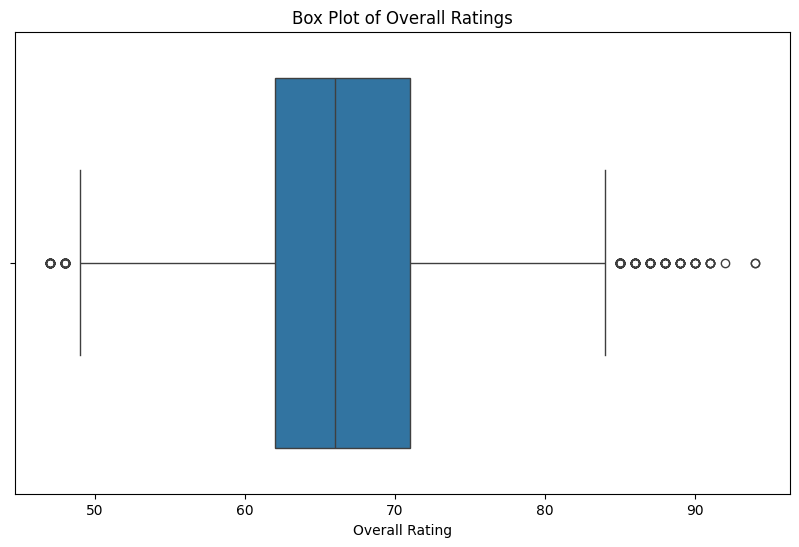

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='overall_rating')
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Overall Rating')
plt.show()

Since the column fullname and name give the same info --> dropping full_name makes sense
Same thing for age and birth_date --> we'll drop the birth_date column
Also since our target variable is overall_rating, columns value_euro, wage_euro and release_clause_euro are not going to
be part of the predictors and the column nationality should not be considered as a predictor variable --> we'll drop
'nationality', 'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro'
Last but not least, preferred_foot column is not a factor contributing to the overall_rating, it's enough to include weak_foot rating --> we'll drop preferred_foot

In [18]:
columns_to_drop = ['full_name', 'birth_date', 'nationality', 'value_euro', 'wage_euro', 'preferred_foot','release_clause_euro']
dataframe.drop(columns=columns_to_drop, axis=0, inplace=True)

In [19]:
dataframe.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'positions', 'overall_rating',
       'potential', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  object 
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

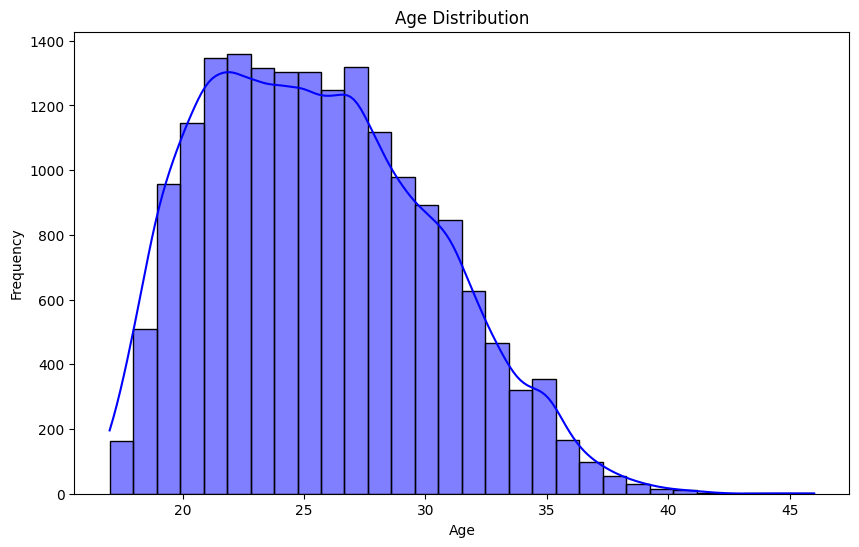

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=dataframe["age"], bins=30, color='blue', kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Most players are concentrated in the younger age groups, with fewer players in the older age ranges.

It suggests that there are fewer older players, likely due to the physically demanding nature of professional sports, leading to earlier retirements.

The skewness could indicate a larger talent pool of younger players entering the game.

In [22]:
dataframe.select_dtypes(include=['object', 'category']).columns

Index(['name', 'positions', 'body_type'], dtype='object')

For the column name, encoding it would be meaningless and it has no role as a predictor for our modeling purposes

for the columns positions and body_type, one hot encoding would be the better choice since there is no ordinal relationship 


In [23]:
dataframe.groupby('body_type').size()

body_type
Akinfenwa                  1
C. Ronaldo                 1
Courtois                   1
Lean                    6468
Messi                      1
Neymar                     1
Normal                 10393
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Stocky                  1086
dtype: int64

In [24]:
dataframe[(dataframe['body_type'] == "PLAYER_BODY_TYPE_25")]

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
14,M. Salah,26,175.26,71.2,"RW,ST",89,90,3,3,4,...,83,63,55,92,84,75,91,38,43,41


In [25]:
dataframe['body_type'] = dataframe['body_type'].replace(
    ['Akinfenwa', 'C. Ronaldo', 'Courtois', 'Messi', 'Neymar', 'PLAYER_BODY_TYPE_25', 'Shaqiri'], 'SPECIAL'
)

In [26]:
dataframe['body_type'].value_counts()

body_type
Normal     10393
Lean        6468
Stocky      1086
SPECIAL        7
Name: count, dtype: int64

In [27]:
dataframe['positions'].unique()[:20]


array(['CF,RW,ST', 'CAM,RM,CM', 'CM,CAM', 'LW,ST', 'CB', 'RW,ST,RM', 'ST',
       'GK', 'CDM,CM', 'CF,ST', 'RW,ST', 'CAM,RW', 'CDM', 'CM,CDM', 'LB',
       'CM,CAM,CDM', 'CAM,CM,LW', 'CAM,CM,RM', 'LW,ST,LM', 'CAM,CM'],
      dtype=object)

In [28]:
all_positions = dataframe['positions'].str.split(',', expand=True).stack()
all_positions.unique()

array(['CF', 'RW', 'ST', 'CAM', 'RM', 'CM', 'LW', 'CB', 'GK', 'CDM', 'LB',
       'LM', 'RB', 'RWB', 'LWB'], dtype=object)

In [29]:
df_body_type_encoded = dataframe['body_type'].str.get_dummies()
df_body_type_encoded

,Lean,Normal,SPECIAL,Stocky
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
17949,0,1,0,0
17950,0,1,0,0
17951,0,1,0,0
17952,1,0,0,0


In [30]:
dataframe = pd.concat([dataframe, df_body_type_encoded], axis=1)
dataframe.drop(columns=['body_type'], axis=1, inplace=True)


In [31]:
df_positions = dataframe['positions'].str.get_dummies(sep=',')
df_positions

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
17950,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17951,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17952,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [32]:
dataframe = pd.concat([dataframe, df_positions], axis=1)
dataframe.drop('positions', axis=1, inplace=True)
dataframe.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'Lean',
       'Normal', 'SPECIAL', 'Stocky', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK',
       'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [33]:
X = dataframe.drop('overall_rating', axis=1)
y = dataframe['overall_rating']

In [34]:
# Drop the name column from the dataframe X --> it has no role in the model training
X.drop('name', axis=1, inplace=True)
X

,age,height_cm,weight_kgs,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,170.18,72.1,94,5,4,4,86,95,70,...,0,0,0,0,0,0,0,1,0,1
1,27,154.94,76.2,89,3,5,4,88,81,52,...,0,0,0,0,0,0,1,0,0,0
2,25,190.50,83.9,91,4,4,5,80,75,75,...,0,0,0,0,0,0,0,0,0,0
3,27,162.56,59.0,88,3,4,4,86,77,56,...,0,0,0,1,0,0,0,0,0,1
4,27,187.96,88.9,91,3,3,2,30,22,83,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,70,1,3,3,57,61,60,...,0,0,0,0,0,0,1,0,0,0
17950,23,182.88,79.8,67,1,3,2,50,19,53,...,0,1,0,0,0,0,0,0,0,0
17951,22,185.42,89.8,67,1,1,1,11,9,13,...,1,0,0,0,0,0,0,0,0,0
17952,21,175.26,64.9,71,1,4,3,42,60,55,...,0,0,1,0,0,0,0,0,0,1


In [35]:
import sklearn as sc
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost Regression': xgb.XGBRegressor(n_estimators=100, random_state=42)
}


In [39]:
def bonus(y_pred, y_test) :
    residuals = y_pred - y_test
    absolute_errors = np.abs(y_test - y_pred)
    absolute_errors_series = pd.Series(absolute_errors, index=y_test.index)
    top_10_indices = absolute_errors_series.nlargest(10).index
    top_10_names = dataframe.loc[top_10_indices, 'name']
    return residuals, top_10_indices, top_10_names

In [47]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Test': {
            'R2 Score': r2_score(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }
    }
    
    return metrics, y_test_pred

In [65]:
residuals = {}
top_10_indices = {}
top_10_names = {}

for model_name, model in models.items():
    metrics, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    residual_values, top_10_indices_values, top_10_names_values = bonus(y_pred, y_test)
    
    residuals[model_name] = residual_values
    top_10_indices[model_name] = top_10_indices_values
    top_10_names[model_name] = top_10_names_values
    
    print(f"\n{model_name}:")
    print("Test Metrics:")
    for metric_name, metric_value in metrics['Test'].items():
        print(f"  {metric_name}: {metric_value}")
    
    


Linear Regression:
Test Metrics:
  R2 Score: 0.9314842372476535
  MAE: 1.4381444837076927
  MSE: 3.4242167991039265
  RMSE: 1.8504639415843602

K-Nearest Neighbors:
Test Metrics:
  R2 Score: 0.9142301105232001
  MAE: 1.5356725146198833
  MSE: 4.286527429685324
  RMSE: 2.0703930616395825

Support Vector Regression:
Test Metrics:
  R2 Score: 0.0002235579745812899
  MAE: 5.538864304859375
  MSE: 49.9658932573811
  RMSE: 7.068655689548127

Random Forest Regression:
Test Metrics:
  R2 Score: 0.9739835248679645
  MAE: 0.7736535783904205
  MSE: 1.3002270955165691
  RMSE: 1.1402750087222684

Decision Tree Regression:
Test Metrics:
  R2 Score: 0.9287838202626286
  MAE: 1.2339181286549707
  MSE: 3.559175717070454
  RMSE: 1.8865777792263043

AdaBoost Regression:
Test Metrics:
  R2 Score: 0.9050412154117389
  MAE: 1.818507351573843
  MSE: 4.745761447404731
  RMSE: 2.178476864096732

XGBoost Regression:
Test Metrics:
  R2 Score: 0.9770708019181813
  MAE: 0.7692259690516574
  MSE: 1.145934046527946

In [67]:
for model_name, residuals in residuals.items():
    print(model_name)
    print(residuals)

    

Linear Regression
9834     0.375035
5815     1.446732
4093     2.960439
7476     3.146314
16455    1.585895
           ...   
16766    0.204483
5414     2.325776
9990    -0.411851
10830    0.483009
7810     1.182333
Name: overall_rating, Length: 3591, dtype: float64
K-Nearest Neighbors
9834     1.2
5815     1.0
4093    -0.6
7476    -1.6
16455    1.4
        ... 
16766   -0.8
5414     2.2
9990    -1.2
10830   -1.0
7810     1.8
Name: overall_rating, Length: 3591, dtype: float64
Support Vector Regression
9834      2.261677
5815     10.261677
4093      7.261677
7476      5.261677
16455    -7.738323
           ...    
16766    -8.738323
5414     12.261677
9990      2.261677
10830     0.261677
7810      5.261677
Name: overall_rating, Length: 3591, dtype: float64
Random Forest Regression
9834     0.00
5815    -1.36
4093    -0.74
7476     2.76
16455    0.02
         ... 
16766    0.08
5414    -0.01
9990    -1.09
10830    2.14
7810    -1.01
Name: overall_rating, Length: 3591, dtype: float64
Dec

In [68]:
for model_name, top_10_indices in top_10_indices.items():
    print(model_name)
    print(top_10_indices)

Linear Regression
Index([5377, 17781, 4653, 6920, 4602, 5025, 5483, 9950, 5359, 16327], dtype='int64')
K-Nearest Neighbors
Index([17587, 17942, 17781, 1962, 5007, 7402, 8, 15571, 17919, 17923], dtype='int64')
Support Vector Regression
Index([0, 17943, 17942, 17929, 8, 14, 17922, 3, 17923, 17928], dtype='int64')
Random Forest Regression
Index([16069, 4653, 15362, 8660, 17781, 6954, 6492, 8748, 5066, 3769], dtype='int64')
Decision Tree Regression
Index([8748, 4653, 5309, 7356, 13792, 3848, 10645, 10097, 4985, 16069], dtype='int64')
AdaBoost Regression
Index([16069, 4843, 4929, 5049, 17781, 4653, 4828, 10365, 4870, 4880], dtype='int64')
XGBoost Regression
Index([4653, 8748, 8660, 6505, 17223, 10256, 8180, 5359, 5527, 3704], dtype='int64')


In [69]:
for model_name, top_10_indices in top_10_names.items():
    print(model_name)
    print(top_10_names)

Linear Regression
{'Linear Regression': 5377           S. Collis
17781       T. Strakosha
4653     Shen Shuaishuai
6920            M. Tyler
4602             L. Ward
5025         E. Petignat
5483      A. Søndergaard
9950        H. Sulaimani
5359           N. Tzanev
16327           B. Sagna
Name: name, dtype: object, 'K-Nearest Neighbors': 17587       S. Ulreich
17942           De Gea
17781     T. Strakosha
1962       H. Sogahata
5007       J. Miszczuk
7402     V. Xenopoulos
8             M. Neuer
15571       M. Flekken
17919        G. Buffon
17923        H. Lloris
Name: name, dtype: object, 'Support Vector Regression': 0            L. Messi
17943       Neymar Jr
17942          De Gea
17929        N. Kanté
8            M. Neuer
14           M. Salah
17922    Thiago Silva
3          L. Insigne
17923       H. Lloris
17928        Coutinho
Name: name, dtype: object, 'Random Forest Regression': 16069            K. Ajer
4653     Shen Shuaishuai
15362            I. Radu
8660           L. García

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30],
    'bootstrap': [True, False]
} 

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error',
                           verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive MAE

print("Best Parameters:", best_params)
print("Best MAE:", best_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}
Best MAE: 0.7714375033455756
